In [1]:
#Generate data
import numpy as np

n = 100
synthetic_data = np.empty((n*n,3))

x = np.linspace(1,20,n)
y = np.linspace(1,20,n)

for i in range(n):
    for j in range(n):
        #synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],(x[i]-10.0)**2-(y[j]-15)**2])
        synthetic_data[i+j*n-1,:] = np.array([x[i],y[j],0.5*(x[i]-10.0)**2-2*y[j]])


#Shuffle contents
np.random.shuffle(synthetic_data)

<IPython.core.display.Javascript object>


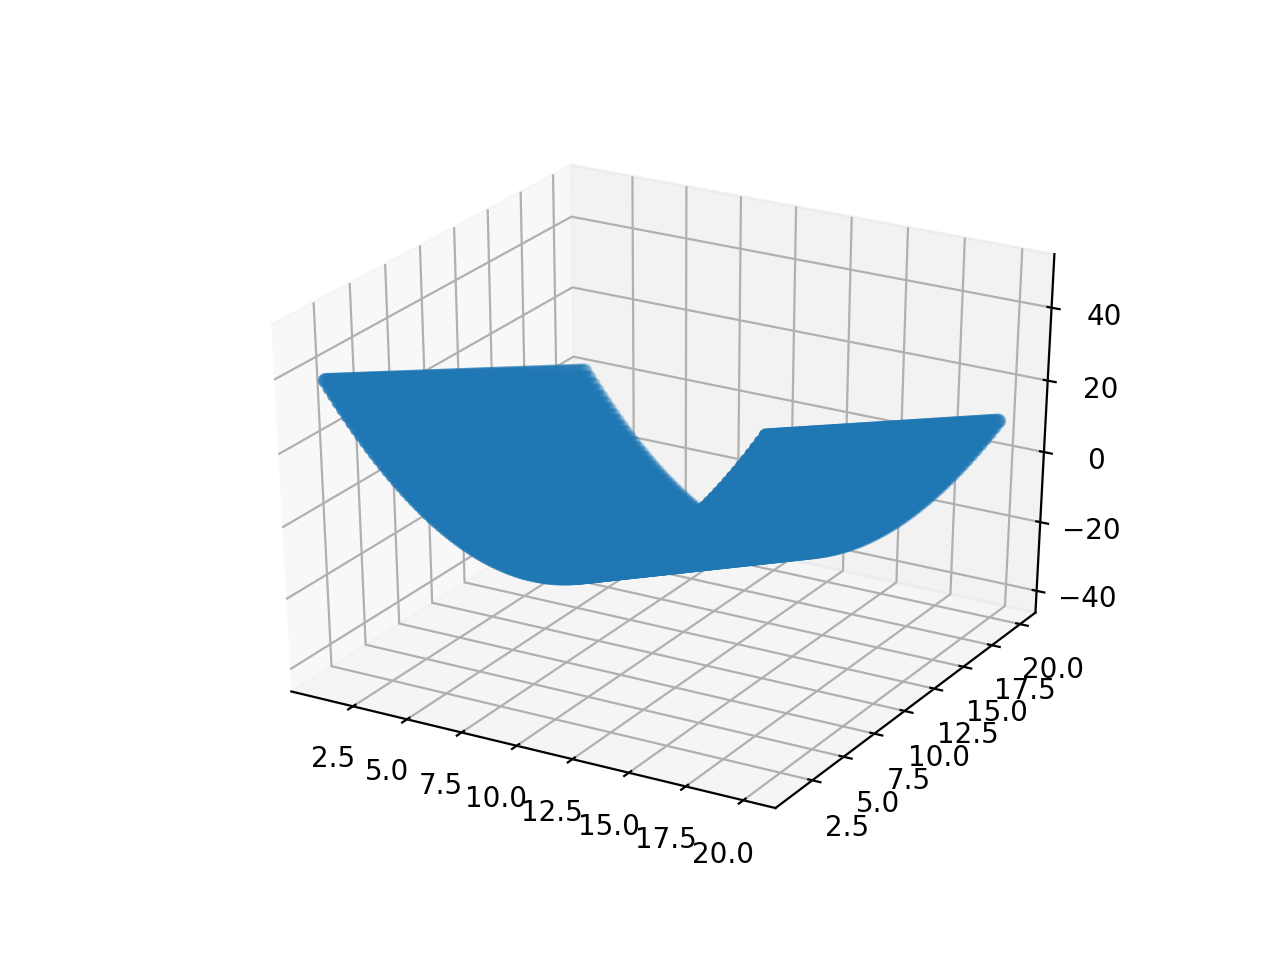

In [2]:
#Graph this data to be sure it is what we want
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(synthetic_data[:,0], synthetic_data[:,1], synthetic_data[:,2])

In [3]:
#Helper functions
def normalise(x):
    """Convert values to range 0-1"""
    x_h = (x - x.min())*1.0 / (x.max() - x.min())
    
    return x_h, x.min(), x.max()

def un_normalise(x_h, x_min, x_max):
    """Convert values from range 0-1 back to normal"""
    x = (x_max-x_min)*x_h + x_min
    
    return x

In [4]:
#Now let's try with an autoencoder
import tensorflow as tf
#Prepare for training and validation with a 70:30 split
split_size = int(synthetic_data.shape[0]*0.7)

#Normalise values
#x_in, x_min, x_max = normalise(synthetic_data)

x_in = synthetic_data

#Remember that for autoencoders we don't need to have any targets since the values themselves are the targets
#train_x, val_x = x[:split_size], x[split_size:]


# number of neurons in each layer
input_num_units = 3
hidden1_num_units = 2
hidden2_num_units = 3
output_num_units = 3

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
x_h = tf.placeholder(tf.float32, [None, output_num_units])


# define weights and biases of the neural network

weights = {
    'hidden1': tf.Variable(tf.random_normal([input_num_units, hidden1_num_units])),
    'hidden2': tf.Variable(tf.random_normal([hidden1_num_units, hidden2_num_units])),
    'output': tf.Variable(tf.random_normal([hidden2_num_units, output_num_units]))
}

biases = {
    'hidden1': tf.Variable(tf.random_normal([hidden1_num_units])),
    'hidden2': tf.Variable(tf.random_normal([hidden2_num_units])),
    'output': tf.Variable(tf.random_normal([output_num_units]))
}

In [12]:
# hidden1 = sigmoid(x*w_h+b_h)
hidden_layer_1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
hidden_layer_1 = tf.nn.sigmoid(hidden_layer_1)

# hidden2 = sigmoid(hidden1*w_h+b_h)
hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, weights['hidden2']), biases['hidden2'])
hidden_layer_2 = tf.nn.sigmoid(hidden_layer_2)

#output_layer = hidden2*w_o+b_o
output_layer = tf.matmul(hidden_layer_2, weights['output']) + biases['output']
#Define cost
cost = tf.reduce_mean(tf.pow(output_layer - x_h, 2))
cross_entropy = -tf.reduce_sum(output_layer*tf.log(x_h))
#Choose Optimiser
optimiser = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


n_rounds = 50000
batch_size = 10000
loss_vector = np.empty(n_rounds)

0 nan 5.65132
1000 nan 5.69182
2000 nan 5.69564
3000 nan 5.64251
4000 nan 5.63958
5000 nan 5.45959
6000 nan 5.61631
7000 nan 5.64422
8000 nan 5.7219
9000 nan 5.49205
10000 nan 5.55029
11000 nan 5.62494
12000 nan 5.69196
13000 nan 5.42309
14000 nan 5.43344
15000 nan 5.53526
16000 nan 5.46345
17000 nan 5.4917
18000 nan 5.65031
19000 nan 5.50501
20000 nan 5.52381
21000 nan 5.52028
22000 nan 5.4771
23000 nan 5.53388
24000 nan 5.42903
25000 nan 5.44913
26000 nan 5.40746
27000 nan 5.63463
28000 nan 5.4023
29000 nan 5.52194
30000 nan 5.45561
31000 nan 5.54176
32000 nan 5.5565
33000 nan 5.43803
34000 nan 5.5343
35000 nan 5.49105
36000 nan 5.54563
37000 nan 5.38931
38000 nan 5.34668
39000 nan 5.46111
40000 nan 5.34253
41000 nan 5.46226
42000 nan 5.23097
43000 nan 5.33708
44000 nan 5.30528
45000 nan 5.4459
46000 nan 5.43175
47000 nan 5.46519
48000 nan 5.2494
49000 nan 5.23512


<IPython.core.display.Javascript object>


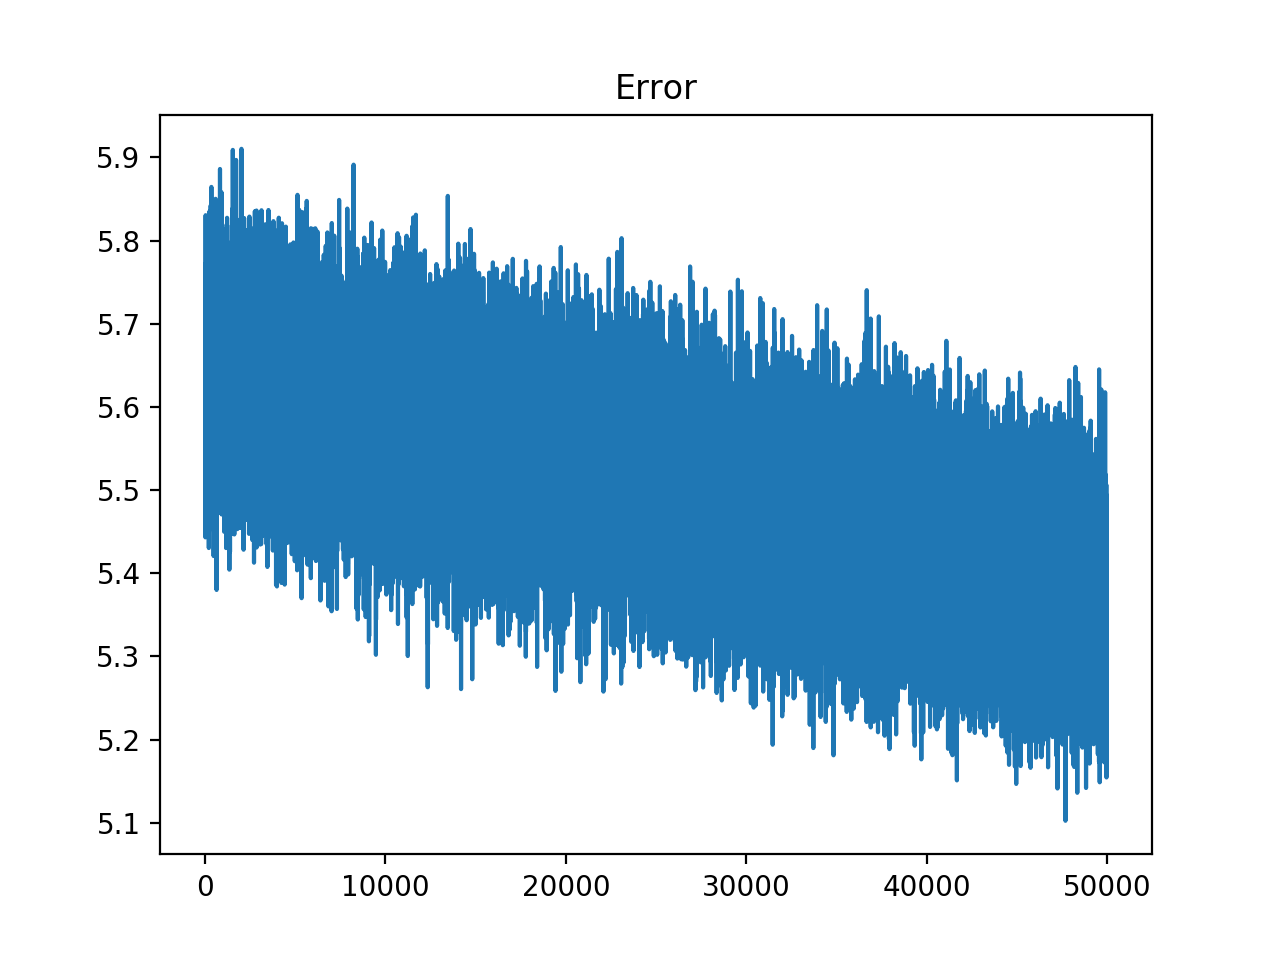

In [14]:
#Training loop

#TODO: add validation since it most likely overfits!

for i in range(n_rounds):
    sample = np.random.randint(n*n, size=batch_size)
    batch_xs = x_in[sample][:]
    batch_ys = x_in[sample][:]
    sess.run(optimiser, feed_dict={x: batch_xs, x_h:batch_ys})
    loss_vector[i] = sess.run(cost, feed_dict={x: batch_xs, x_h:batch_ys})
    if i % 1000 == 0:
        print i, sess.run(cross_entropy, feed_dict={x: batch_xs, x_h:batch_ys}), sess.run(cost, feed_dict={x: batch_xs, x_h:batch_ys})
        
fig = plt.figure()
plt.plot(loss_vector)
plt.title('Error')
plt.show()

In [15]:
W_h1,W_h2 = sess.run(weights['hidden1']),sess.run(weights['hidden2'])
B_h1,B_h2 = sess.run(biases['hidden1']),sess.run(biases['hidden2'])
W_o = sess.run(weights['output'])
B_o = sess.run(biases['output'])

In [16]:
#downscale synthetic data
reconstructed_data = np.empty((n*n,3))
def sigmoid (x): return 1/(1 + np.exp(-x))  
def relu(x): return np.maximum(x, 0)

for i in range(len(x_in)): 
    # hidden1 = sigmoid(x*w_h+b_h)
    hidden_layer_1 = np.dot(x_in[i,:], W_h1) + B_h1
    hidden_layer_1 = sigmoid(hidden_layer_1)

    # hidden2 = sigmoid(hidden1*w_h+b_h)
    hidden_layer_2 = np.dot(hidden_layer_1, W_h2) + B_h2
    hidden_layer_2 = sigmoid(hidden_layer_2)

    #output_layer = hidden2*w_o+b_o
    output_layer = np.dot(hidden_layer_2, W_o) + B_o
    
    reconstructed_data[i,:] = output_layer
    #print np.mean(np.power(reconstructed_data[i,:]-x_in[i,:],2))
#reconstructed_data = un_normalise(reconstructed_data, x_min, x_max)

<IPython.core.display.Javascript object>


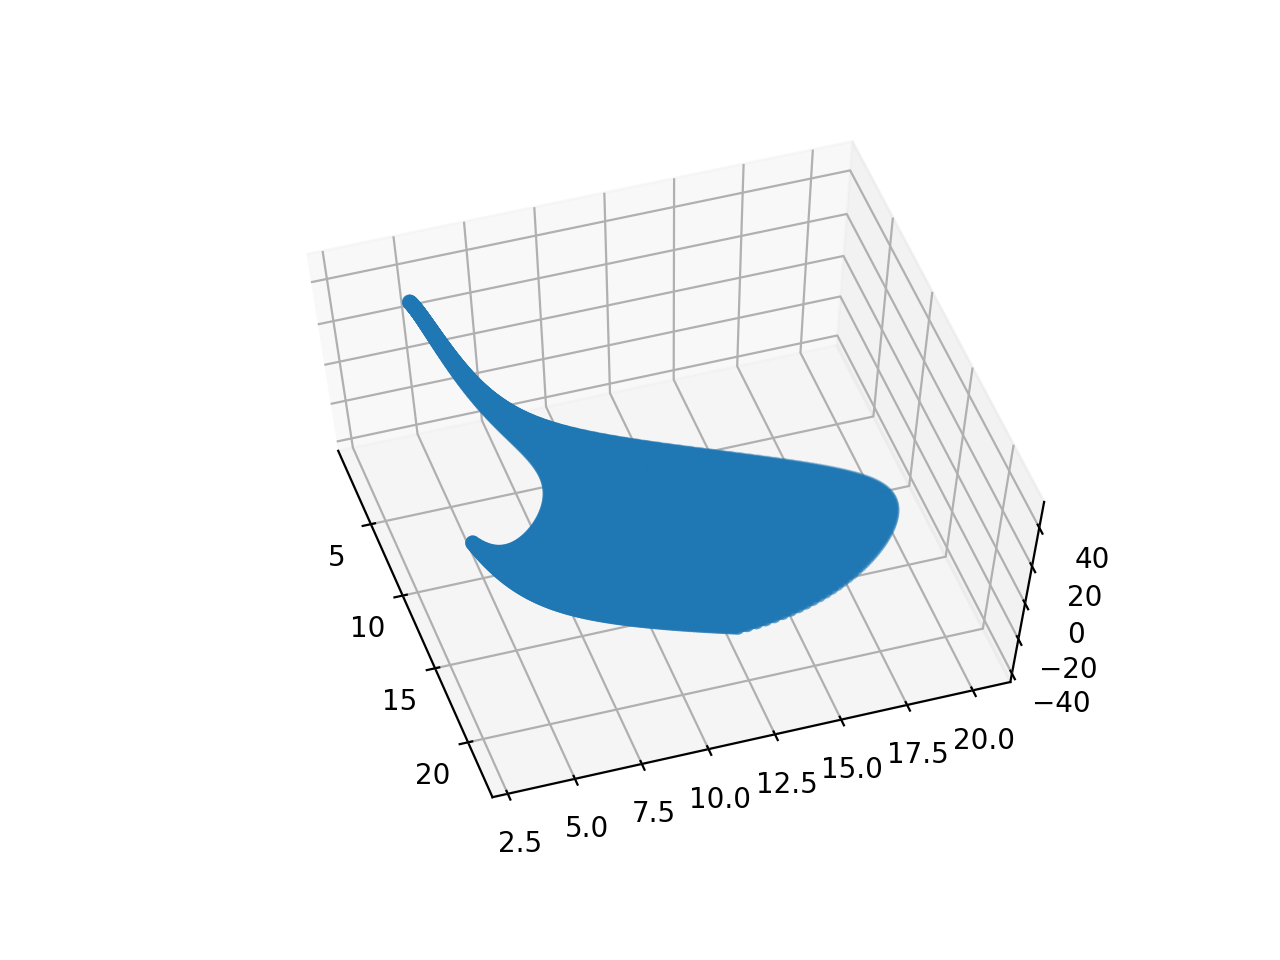

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], reconstructed_data[:,2])

In [ ]:
np.savetxt('reconstructed.csv', reconstructed_data, delimiter=",")
np.savetxt('synthetic.csv', synthetic_data, delimiter=",")